# TDS Character Recognition Project
## Image Preprocessing Tests

We'll use some packages we have not used before, namely: **skimage** and **opencv**. If necessary, install them with:
```bash
pip install scikit-image opencv-python opencv-contrib-python
```


In [1]:
import skimage
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np
import cv2

import os
import glob

In [2]:
%matplotlib inline

### Load our image database.

In [3]:
imset = np.array([plt.imread(i) for i in glob.glob("../images/*.jpg")])

print("Size of our dataset: {} images.\nEach image has dimensions: {}.\nEach channel is of type: {}".format( \
    imset.shape[0], imset[0].shape, type(imset[0][0][0][0])))

Size of our dataset: 21 images.
Each image has dimensions: (480, 480, 3).
Each channel is of type: <class 'numpy.uint8'>


We will be working with a random sample image from the set from this point on.

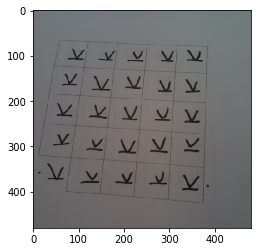

In [4]:
sim = np.random.permutation(imset)[0]
plt.imshow(sim)

### Image cleanup

The original images didn't use any sofisticated methods for capturing (e.g. special lighting, controlled orientation, etc.). Therefore, we first need to perform some cleanup and enhancement, which will help subsequent algorithms perform their job.

C:\Users\Mijael\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'Adaptive histogram + \ngrayscale conversion')

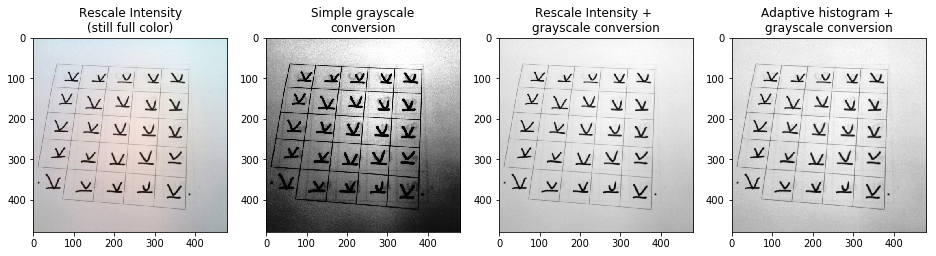

In [5]:
plt.figure(figsize=(16,8))

plt.subplot(241)
plt.imshow(exposure.rescale_intensity(sim))
plt.title("Rescale Intensity\n(still full color)")
plt.subplot(242)
plt.imshow(exposure.equalize_hist(skimage.color.rgb2gray(sim)), cmap="gray")
plt.title("Simple grayscale\nconversion")
plt.subplot(243)
plt.imshow(exposure.rescale_intensity(skimage.color.rgb2gray(sim)), cmap="gray")
plt.title("Rescale Intensity + \ngrayscale conversion")

plt.subplot(244)
plt.imshow(skimage.color.rgb2gray(exposure.equalize_adapthist(sim)), cmap="gray")
plt.title("Adaptive histogram + \ngrayscale conversion")
#plt.subplot(245)
#plt.imshow(exposure.equalize_hist(skimage.color.rgb2gray(sim)), cmap="gray")

### Selected "Rescale Intensity" + Grayscale Conversion
(Note how the three channels for R, G, and B are flattened into a single channel.)

In [6]:
sim.dtype

dtype('uint8')

In [7]:
print("Data type of each channel, originally: {}".format(sim.dtype))

t = skimage.img_as_ubyte(skimage.color.rgb2gray(sim))
print("Data type of each channel after grayscale: {}".format(t.dtype))

t = exposure.rescale_intensity(t)
print("Data type of each channel after rescaling intensity: {}".format(t.dtype))

Data type of each channel, originally: uint8
Data type of each channel after grayscale: uint8
Data type of each channel after rescaling intensity: uint8


C:\Users\Mijael\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [8]:
print("Image dimensions before conversion: {}".format(sim.shape))
sim = skimage.img_as_ubyte(exposure.rescale_intensity(skimage.color.rgb2gray(sim)))
print("Image dimensions after conversion: {}".format(sim.shape))

Image dimensions before conversion: (480, 480, 3)
Image dimensions after conversion: (480, 480)


C:\Users\Mijael\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


### Edge detection

Let's find the edges using the Canny algorithm. Further reading here:
* https://en.wikipedia.org/wiki/Canny_edge_detector
* http://fourier.eng.hmc.edu/e161/lectures/canny/node1.html
* http://aishack.in/tutorials/canny-edge-detector/

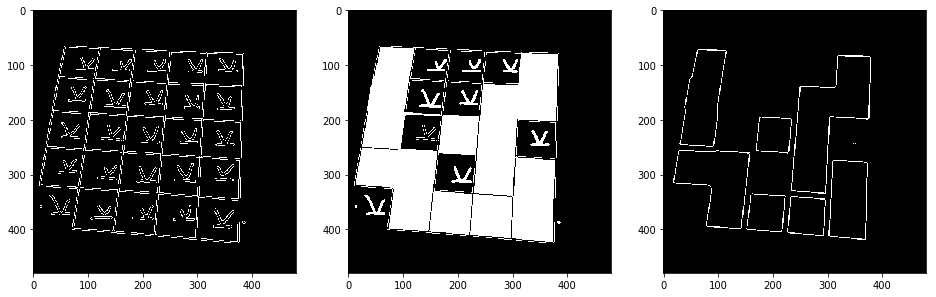

In [9]:
from skimage.feature import canny
edges = canny(sim)

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(edges, cmap="gray")

from scipy import ndimage as ndi
plt.subplot(1,3,2)
plt.imshow(ndi.binary_fill_holes(edges), cmap="gray")

plt.subplot(1,3,3)
plt.imshow(canny(ndi.binary_fill_holes(edges)), cmap="gray")

In [10]:
contours = skimage.measure.find_contours(canny(ndi.binary_fill_holes(edges)),level=0.8)

print("Found {} contours".format(len(contours)))

Found 14 contours


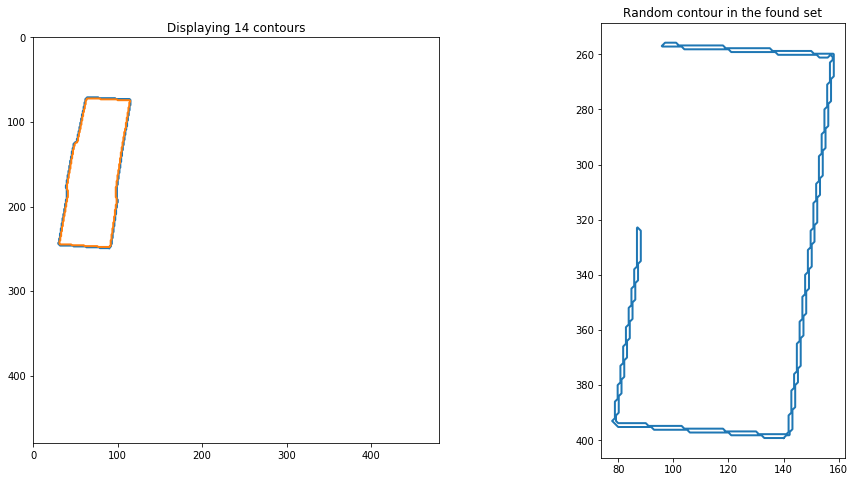

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)

for n, contour in enumerate(contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    #areas.append(skimage.measure.regionprops(skimage.measure.label(contour,connectivity=2)))
    if n==1:
        break
plt.title("Displaying {} contours".format(len(contours)))
plt.xlim(0, 480)
plt.ylim(0,480)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
contour = np.random.permutation(contours)[0]

plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.title("Random contour in the found set".format(len(contours)))
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()

In [12]:
print("The contour is described with {} points in sequence. \n\nAn sample of these values is: \n\n{}".format( \
    len(contour), contour[0:10]))

The contour is described with 745 points in sequence. 

An sample of these values is: 

[[399.2 140. ]
 [399.2 139. ]
 [399.2 138. ]
 [399.2 137. ]
 [399.2 136. ]
 [399.2 135. ]
 [399.2 134. ]
 [399.2 133. ]
 [399.  132.8]
 [398.2 132. ]]


### Labeled regions

The labeling algorithm tries to group as many *connected* pixels as possible. Each group of pixels (called *a region*) is labeled with a number. The output of this algorithm is "an image" (i.e. an array representing an image), where each "pixel" has the value of its region. The background receives a value of zero.

Found 18 regions. A non-zero sample of the values is:

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


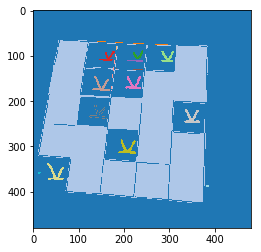

In [13]:
labeled = skimage.measure.label(ndi.binary_fill_holes(edges), return_num=True)

print("Found {} regions. A non-zero sample of the values is:\n\n{}".format(labeled[1], labeled[0][labeled[0] > 1][0:100]))

plt.imshow(labeled[0], cmap="tab20")

#### How do we find the correct region?
A good option for the type of images we are manipulating is to find the "largest" area(s) and do something with them. We will use the area of the regions to get the largest and discard the rest.

Using `skimage.measure.regionprops` we can obtain the area of the labeled regions. Note that we will obtain as many sets of properties as the number of regions we have.

In [14]:
pr = skimage.measure.regionprops(labeled[0])
areas = np.array([pr[i].area for i in range(len(pr))])
print("These are the areas for all of the regions: \n\t{}\n\nThe largest region is that at index {}.".format( \
    areas, np.argmax(areas)))

These are the areas for all of the regions: 
	[79155   157    17   183   356   305    83   141    60   468   415     2
   186   469   461   487    23    25]

The largest region is that at index 0.


In [15]:
pr[0].coords

array([[ 65,  57],
       [ 65,  58],
       [ 65,  59],
       ...,
       [425, 373],
       [425, 374],
       [425, 375]], dtype=int64)

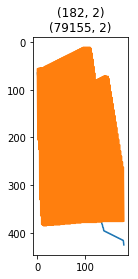

In [16]:
simplified = skimage.measure.approximate_polygon(pr[0].coords, 10)

plt.plot(simplified)
plt.title("{}\n{}".format(simplified.shape, pr[0].coords.shape))
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()

In [17]:
pr[0].perimeter

6011.266160752982

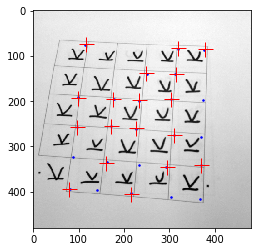

In [18]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks

t = canny(ndi.binary_fill_holes(edges))

coords = corner_peaks(corner_harris(t), min_distance=50)
coords_subpix = corner_subpix(t, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(sim, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)

In [19]:
edges = cv2.Canny(skimage.img_as_ubyte(sim), threshold1=30, threshold2=200)

(contours, _) = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[0]
screenCnt = None
contours

ValueError: too many values to unpack (expected 2)